In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math
import tqdm
import optuna
import matplotlib.pyplot as plt

In [2]:
chin07 = pd.read_excel("/Users/inouekiyoshi/Library/Mobile Documents/com~apple~Numbers/Documents/chin07.xlsx",index_col=0)
chin07  

,1,2,3,4,5,6,7,8,9,10,...,97,98,99,100,101,102,103,104,105,106
1,-0.159900,-0.052800,0.017700,-0.396100,0.034000,-0.031600,-0.103700,-0.507400,-0.097300,0.053500,...,-0.000900,0.002600,0.280400,-0.003200,-0.022500,0.009900,0.021300,0.013300,-0.060300,-0.019700
2,-0.159900,-0.052800,0.017700,-0.396100,0.034000,-0.031600,-0.103700,-0.243900,-0.097300,0.053500,...,-0.000900,0.002600,0.280400,-0.003200,-0.022500,0.009900,0.021300,0.013300,-0.060300,-0.019700
3,-0.159900,-0.052800,0.017700,-1.026700,0.034000,-0.031600,-0.103700,-0.243900,-0.097300,0.053500,...,-0.000900,0.002600,0.280400,-0.003200,-0.022500,0.009900,0.021300,0.013300,-0.060300,-0.019700
4,-0.159900,-0.052800,0.017700,-0.182600,0.034000,-0.031600,-0.103700,-0.243900,-0.097300,0.053500,...,-0.000900,0.002600,0.280400,-0.003200,-0.022500,0.009900,0.021300,0.013300,-0.060300,-0.019700
5,0.265100,-0.052800,0.017700,0.010700,0.034000,-0.031600,0.012000,-0.243900,-0.097300,0.053500,...,-0.000900,0.002600,0.280400,-0.003200,-0.022500,0.009900,0.021300,0.013300,-0.060300,-0.019700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
out3,-0.090088,-0.005679,0.192402,-0.134553,-0.087229,0.084115,0.291586,0.049682,-0.159526,-0.268062,...,0.073891,-0.032199,-0.115032,-0.264316,0.107866,0.079619,0.326709,-0.123156,0.024471,-0.000358
out4,-0.634703,0.188877,-0.016539,-0.045775,0.108053,0.280210,0.057139,-0.132316,0.261257,-0.102028,...,-0.001068,-0.119141,0.285350,0.159624,-0.118591,0.130766,0.119857,-0.539387,-0.154919,0.265596
out5,-0.684023,-0.714745,-1.011498,0.465976,-0.003450,-0.556974,-0.267338,-0.128580,0.372200,-1.198347,...,-0.200467,0.510243,-0.735992,-0.269868,0.707126,0.053456,-1.433486,-0.576037,-0.566147,-0.035926
out6,2.004422,2.455895,0.002784,-0.633038,2.184560,2.081852,2.582015,0.807239,0.535628,2.684185,...,-0.017312,0.041337,-0.002784,0.123914,-0.025541,-0.224077,-0.072520,0.496500,0.353878,-0.269561


In [3]:
X_1=chin07.iloc[251:296]
X_1_tra=X_1.iloc[:,:86]
X_1_tes=X_1.iloc[:,86:]
X_1_tes.shape

(45, 20)

In [4]:
X_2=chin07.iloc[157:191]
X_2_tra=X_2.iloc[:,:86]
X_2_tes=X_2.iloc[:,86:]
X_2_tes.shape

(34, 20)

In [21]:
y=chin07.loc["out1"]
y_tra=y[:86]
y_tes=y[86:]
y_tes.shape

(20,)

In [124]:

sJIVE_tes_lis=[]
W_sJIVE_tes_lis=[]

#生成するデータの条件
# p_1=100
# p_2=100
# n=150
# r_J_or=30
# r_1_or=30
# r_2_or=30
# r_prop=0.3
# w_J=1.0
# w_1=1.0
# w_2=1.0
# W_J_lis=[10,5,3]
# for i in range(27):
#     W_J_lis.append(0.1)
# W_1_lis=[10,5,3]
# for i in range(27):
#     W_1_lis.append(0.1)
# W_2_lis=[10,5,3]
# for i in range(27):
#     W_2_lis.append(0.1)
# X1_erro=0.001
# X2_erro=0.001
# y_erro=0.0001

#sJIVEと共通の条件
k = 5
kf = KFold(n_splits=k)

times=100
threshold=1.0

#sJIVEに固有の条件

times_tes=100
threshold_tes=1.0

eta=0.95
r_J_s=1
r_1_s=1
r_2_s=1

#proposedに固有の条件

r_J_W=9
r_1_W=9
r_2_W=9


lam_J=0.1
lam_1=0.1
lam_2=0.1
gamma_1=0
gamma_21=0
gamma_22=0

for i in tqdm.tqdm(range(1)):
    #データの生成
    # X_1_al,X_2_al,y_al=function.gene_data_2(p_1,p_2,n,r_J_or,r_1_or,r_2_or,r_prop,W_J_lis=W_J_lis,W_1_lis=W_1_lis,W_2_lis=W_2_lis,X1_erro=X1_erro,X2_erro=X2_erro,y_erro=y_erro)
    # X_1_original=X_1_al[:,:100]
    # X_2_original=X_2_al[:,:100]
    # y_original=y_al[:,:100]

    # X_1_test=X_1_al[:,100:150]
    # X_2_test=X_2_al[:,100:150]
    # y_test=y_al[:,100:150]
    
    ar_X_1_tra=X_1_tra.values
    ar_X_1_tes=X_1_tes.values
    ar_X_2_tra=X_2_tra.values
    ar_X_2_tes=X_2_tes.values
    ar_y_tra=y_tra.values
    ar_y_tes=y_tes.values

    df_tra=np.row_stack((ar_X_1_tra,ar_X_2_tra,ar_y_tra))
    df_tes=np.row_stack((ar_X_1_tes,ar_X_2_tes,ar_y_tes))

    # sJIVEの実装
    # #パラメータ推定
    # ##sJIVEのパラメータ推定の定義式
    # def objective(trial):
    #     #ハイパーパラメータを定義
    #     eta=trial.suggest_float("eta",0.01,0.99)
    #     r_J=trial.suggest_int("r_J",1,15)
    #     r_1=trial.suggest_int("r_1",1,10)
    #     r_2=trial.suggest_int("r_2",1,10)

    #     accuracy_sJIVE_cv=function.cv_sJIVE_2(df_tra,eta=eta,r_J=r_J,r_1=r_1,r_2=r_2,times=times,threshold=threshold,times_tes=times_tes,threshold_tes=threshold_tes)

    #     return accuracy_sJIVE_cv
    # ###推定
    # study=optuna.create_study(direction="minimize")
    # study.optimize(objective,n_trials=100)
    # best_params = study.best_params
    # best_accuracy = study.best_value

    # ##sJIVEの実行
    # eta=best_params["eta"]
    # r_J_s=best_params["r_J"]
    # r_1_s=best_params["r_1"]
    # r_2_s=best_params["r_2"]

    erro_lis,number_best,erro_best,S_J_best,U_1_best,U_2_best,theta_1_best,S_1_best,W_1_best,theta_21_best,S_2_best,W_2_best,theta_22_best,hat_X_y_best=function.sJIVE(
        eta=eta,times=times,r_J=r_J_s,r_1=r_1_s,r_2=r_2_s,X_1_or=ar_X_1_tra,X_2_or=ar_X_2_tra,y_or=ar_y_tra,threshold=threshold)
    
    ##テストデータに対して実行
    erro_tes_lis,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,y_new,erro_result=function.sJIVE_prediction(
        ar_X_1_tes,ar_X_2_tes,ar_y_tes,U_1_best,U_2_best,W_1_best,W_2_best,theta_1_best,theta_21_best,theta_22_best,times_tes,threshold_tes)
    
    ##結果をリストに代入
    sJIVE_tes_score=np.linalg.norm(ar_y_tes-y_new)**2
    sJIVE_tes_lis.append(sJIVE_tes_score)

    #proposed_methodの実行
    ##パラメータ推定
    # def objective_2(trial):
    # #ハイパーパラメータを定義
    #     lam_J=trial.suggest_float("lam_J",0.00,1.00)
    #     lam_1=trial.suggest_float("lam_1",0.00,0.50)
    #     lam_2=trial.suggest_float("lam_2",0.00,0.50)
    #     gamma_1=trial.suggest_float("gamma_1",0.00,2.00)
    #     gamma_21=trial.suggest_float("gamma_21",0.00,2.00)
    #     gamma_22=trial.suggest_float("gamma_22",0.00,2.00)

    #     accuracy_W_sJIVE_decomposition=function.cv_W_sJIVE_decomposition_2(df_tra,r_J=r_J_W,r_1=r_1_W,r_2=r_2_W,lam_J=lam_J,lam_1=lam_1,lam_2=lam_2,gamma_1=gamma_1,gamma_21=gamma_21,gamma_22=gamma_22,times=times,threshold=threshold,k=k)

    #     return accuracy_W_sJIVE_decomposition
        
    # study_2=optuna.create_study(direction="minimize")
    # study_2.optimize(objective_2,n_trials=100)
    # best_params_2 = study_2.best_params
    # best_accuracy_2 = study_2.best_value

    # lam_J=best_params_2["lam_J"]
    # lam_1=best_params_2["lam_1"]
    # lam_2=best_params_2["lam_2"]
    # gamma_1=best_params_2["gamma_1"]
    # gamma_21=best_params_2["gamma_21"]
    # gamma_22=best_params_2["gamma_22"]

    erro_lis_W,erro_best_W,S_J_best_W,U_1_best_W,U_2_best_W,S_1_best_W,W_1_best_W,S_2_best_W,W_2_best_W,sigma_J_best_W,sigma_1_best_W,sigma_2_best_W,M_J_best_W,M_1_best_W,M_2_best_W,hat_X_best_W=function.W_sJIVE_decompositon_1(
        times=times,r_J=r_J_W,r_1=r_1_W,r_2=r_2_W,X_1_or=ar_X_1_tra,X_2_or=ar_X_2_tra,threshold=threshold
        )
    erro_y_lis_W,erro,theta_1_best_W,theta_21_best_W,theta_22_best_W,hat_y_W=function.W_sJIVE_decomposition_2(
        ar_y_tra,times,lam_J,lam_1,lam_2,gamma_1,gamma_21,gamma_22,S_J_best_W,S_1_best_W,S_2_best_W,sigma_J_best_W,sigma_1_best_W,sigma_2_best_W
    )
    nonzero_theta_1 = np.nonzero(theta_1_best_W)[0]
    theta_1_best_sparse=theta_1_best_W[nonzero_theta_1]

    U_1_best_sparse=U_1_best_W[:,nonzero_theta_1]
    U_2_best_sparse=U_2_best_W[:,nonzero_theta_1]
    S_J_best_sparse=S_J_best_W[nonzero_theta_1,:]
    M_J_best_sparse=M_J_best_W[nonzero_theta_1,:]
    sigma_J_best_sparse=sigma_J_best_W[nonzero_theta_1]

    nonzero_theta_21 = np.nonzero(theta_21_best_W)[0]
    theta_21_best_sparse=theta_21_best_W[nonzero_theta_21]
    W_1_best_sparse=W_1_best_W[:,nonzero_theta_21]
    S_1_best_sparse=S_1_best_W[nonzero_theta_21,:]
    M_1_best_sparse=M_1_best_W[nonzero_theta_21,:]
    sigma_1_best_sparse=sigma_1_best_W[nonzero_theta_21]

    nonzero_theta_22 = np.nonzero(theta_22_best_W)[0]
    theta_22_best_sparse=theta_22_best_W[nonzero_theta_22]
    W_2_best_sparse=W_2_best_W[:,nonzero_theta_22]
    S_2_best_sparse=S_2_best_W[nonzero_theta_22,:]
    M_2_best_sparse=M_2_best_W[nonzero_theta_22,:]
    sigma_2_best_sparse=sigma_2_best_W[nonzero_theta_22]

    erro_tes_lis_w,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,theta_1_new,theta_21_new,theta_22_new,y_new_W,erro_result,sigma_J_new=function.W_sJIVE_prediction(
        X_1_tes=ar_X_1_tes,X_2_tes=ar_X_2_tes,y_tes=ar_y_tes,gamma_1=gamma_1,gamma_21=gamma_21,gamma_22=gamma_22,U_1_best_sparse=U_1_best_sparse,U_2_best_sparse=U_2_best_sparse,W_1_best_sparse=W_1_best_sparse,W_2_best_sparse=W_2_best_sparse,theta_1_best_sparse=theta_1_best_sparse,theta_21_best_sparse=theta_21_best_sparse,theta_22_best_sparse=theta_22_best_sparse,sigma_J_best_sparse=sigma_J_best_sparse,sigma_1_best_sparse=sigma_1_best_sparse,sigma_2_best_sparse=sigma_2_best_sparse,times_tes=100,threshold_tes=0.01
    )

    ##結果をリストに代入
    W_sJIVE_tes_score=np.linalg.norm(ar_y_tes-y_new_W)**2
    W_sJIVE_tes_lis.append(W_sJIVE_tes_score)

100%|██████████| 1/1 [00:06<00:00,  6.44s/it]


In [125]:
sJIVE_tes_lis

[1.9764358514315945]

In [126]:
W_sJIVE_tes_lis

[39.01548667647781]

In [10]:
print(r_J_s)
print(r_1_s)
print(r_2_s)

10
10
10


In [31]:
theta_1_best_sparse

array([-0.11601792,  0.02047175, -0.00740263, -0.00130918,  0.00377989,
        0.01029503,  0.00328919, -0.00513025, -0.00202748,  0.00163174,
       -0.00035675, -0.00473271, -0.003165  , -0.00339371, -0.00289196,
       -0.00100653,  0.00125348,  0.00086303,  0.00031506,  0.00064451,
       -0.00150326,  0.00075215, -0.00095157,  0.00094833, -0.00041896])

In [85]:
ar_X_tra=np.row_stack((ar_X_1_tra,ar_X_2_tra))

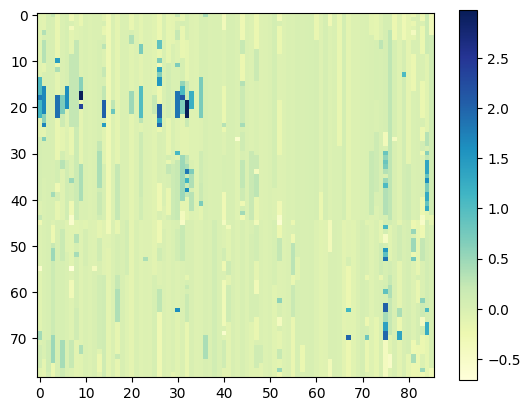

In [101]:
plt.imshow(ar_X_tra, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

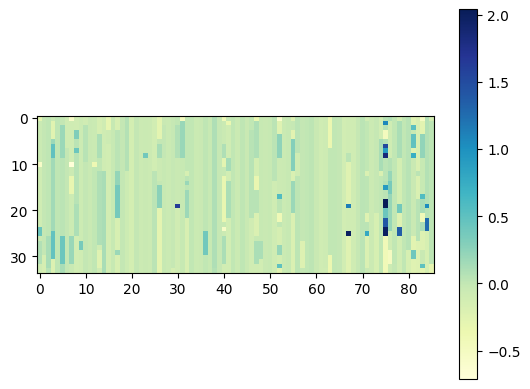

In [102]:
plt.imshow(ar_X_2_tra, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [80]:
ar_y_tra_1=ar_y_tra.reshape(1,86)

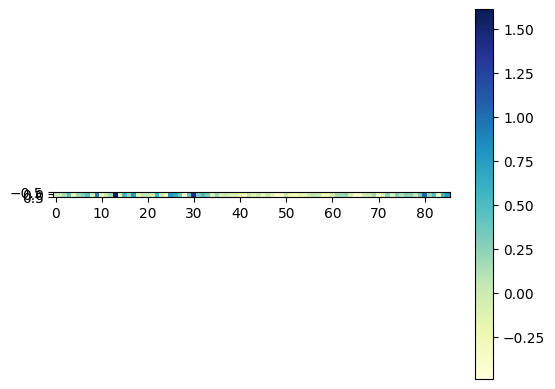

In [103]:
plt.imshow(ar_y_tra_1, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [121]:
U_best=np.row_stack((U_1_best,U_2_best))
ones = np.ones((1, 86))
# arr_lis=arr_list.reshape(1,86)
est_joint=U_best.dot(S_J_best)
est_inv_1=W_1_best.dot(S_1_best)
est_inv_2=W_2_best.dot(S_2_best)
est_ar=np.row_stack((df_tra,ones,est_joint,ones,est_inv_1,ones,est_inv_2))

In [109]:
min_val = min(est_joint.min(), est_inv_1.min(),est_inv_2.min())
max_val = max(est_joint.max(), est_inv_1.max(),est_inv_2.max())

# 共通の尺度でデータをスケーリング
scaled_est_joint = (est_joint - min_val) / (max_val - min_val)
scaled_est_inv_1= (est_inv_1- min_val) / (max_val - min_val)
scaled_est_inv_2= (est_inv_2- min_val) / (max_val - min_val)

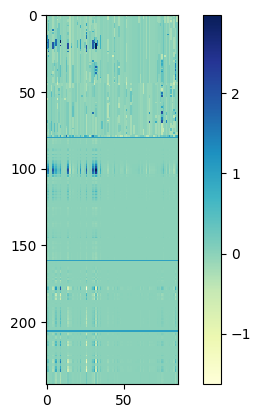

In [122]:
plt.imshow(est_ar, cmap="YlGnBu", interpolation='nearest')
plt.colorbar()
plt.show()

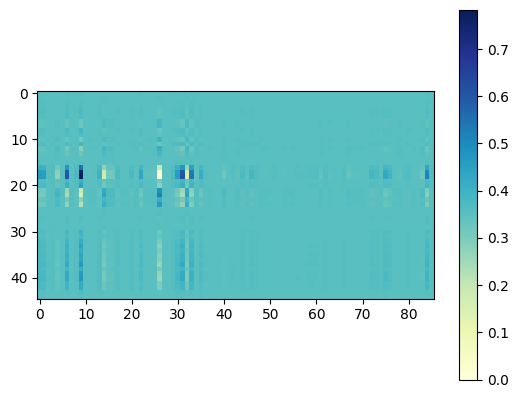

In [112]:
plt.imshow(scaled_est_inv_1, cmap="YlGnBu", interpolation='nearest')
plt.colorbar()
plt.show()